In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
from json import loads
from ast import literal_eval
from sys import path as pth
pth.insert(1, '/home/lucas/projeto-outros-Mendes1302') 
from api_resquest.themoviedb import Movies as ms

# Datasource Details 

In [4]:
data = pd.read_csv('/home/lucas/projeto-outros-Mendes1302/data_source/movies_details.csv')
cols_rm = ['Unnamed: 0.1', 'Unnamed: 0']
data = data.drop(cols_rm, axis=1)

# Remover o que não tem votos
data = data[data.vote_count != 0]

# Remover o que não tem genres
data = data[data.genre_ids != '[]']

# Remover o que não tem original_language igual en
#data = data[data.original_language == 'en']
data.index = range(data.shape[0])
data

,title,year_publication,budget,revenue,runtime,genre_ids,original_language,popularity,id_movie,vote_average,vote_count
0,citizen kane,1941,839727,23218000,119,"[9648, 18]",en,18.681,15,8.019,4851
1,vertigo,1958,2479000,7797728,128,"[9648, 10749, 53]",en,30.818,426,8.191,5053
2,2001: a space odyssey,1968,12000000,71923560,149,"[878, 9648, 12]",en,38.672,62,8.085,10192
3,tokyo story,1953,0,0,137,[18],ja,15.336,18148,8.219,871
4,the rules of the game,1939,8847685,0,106,"[18, 35, 10749]",fr,11.757,776,7.592,479
...,...,...,...,...,...,...,...,...,...,...,...
964,floating weeds,1959,0,0,115,[18],ja,9.803,46918,7.479,142
965,sholay,1975,408000,4800000,204,[28],hi,9.012,12259,7.000,224
966,branded to kill,1967,0,0,91,"[28, 80, 18]",ja,10.597,17905,7.200,196
967,trás-os-montes,1976,0,0,108,[99],pt,0.938,186967,6.591,11


In [5]:
df = pd.read_csv('/home/lucas/projeto-outros-Mendes1302/data_source/movies_metadata.csv')
df

/tmp/ipykernel_23033/4005278503.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/lucas/projeto-outros-Mendes1302/data_source/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [6]:
cols_rm = ['adult', 'belongs_to_collection', 'homepage', 
           'imdb_id', 'original_title', 'overview',
           'poster_path', 'production_countries', 'production_companies',
           'spoken_languages', 'status', 'tagline', 'video']
df = df.drop(cols_rm, axis=1)

In [ ]:
def _add_movie(data, results, title):
    if len(data[data.id_movie == results['id']]) > 0:
        print(444)
        return data
    year = datetime.strptime(results['release_date'], '%Y-%m-%d').strftime('%Y')
    dict_results = {'title': title, 'year_publication': year, 'budget': results['budget'], 'revenue' : results['revenue'],
                        'runtime' : results['runtime'], 'genre_ids': [results['genre_ids']], 
                        'original_language' : results['original_language'], 
                        'popularity' : results['popularity'], 'id_movie': results['id'],
                        'vote_average' : results['vote_average'], 'vote_count' : results['vote_count']} 
    data = pd.concat([data, pd.DataFrame(dict_results)])
    data.index = range(data.shape[0])
    return data

In [7]:
cols_rename = {'genres': 'genre_ids', 'id': 'id_movie', 'release_date': 'year_publication'}
df = df.rename(cols_rename, axis=1)
df

,budget,genre_ids,id_movie,original_language,popularity,year_publication,revenue,runtime,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,fa,0.072051,NaN,0.0,90.0,Subdue,4.0,1.0
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tl,0.178241,2011-11-17,0.0,360.0,Century of Birthing,9.0,3.0
45463,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,0.903007,2003-08-01,0.0,90.0,Betrayal,3.8,6.0
45464,0,[],227506,en,0.003503,1917-10-21,0.0,87.0,Satan Triumphant,0.0,0.0


In [36]:
# Aumentar a base
for i in range(df.shape[0]):
    id_movie = df.id_movie[i]
    if '-' in id_movie: continue
    df_aux = data[data.id_movie == int(id_movie)]
    try:
        if len(df_aux) == 0:
            genres_id = [value['id'] for value in literal_eval(df.genre_ids[i])]
            if str(df.year_publication[i]) == 'nan': continue
            print(df.title[i])
            year = datetime.strptime(df.year_publication[i], '%Y-%m-%d').strftime('%Y')
            dict_results = {'title': df.title[i], 'year_publication': year, 'budget': df.budget[i], 
                            'revenue': df.revenue[i], 'runtime': df.runtime[i], 'genre_ids': [genres_id], 
                            'original_language': df.original_language[i], 'id_movie': df.id_movie[i],
                            'popularity': df.popularity[i], 'vote_count': df.vote_count[i],
                            'vote_average': df.vote_average[i]} 
            data = pd.concat([data, pd.DataFrame(dict_results)])
            data.index = range(data.shape[0])
    except Exception as error:
        print(error)
        continue
data.to_csv('movies_crawler_and_more.csv')

Jumanji
Grumpier Old Men
Waiting to Exhale
Father of the Bride Part II
Sabrina
Tom and Huck
Sudden Death
GoldenEye
The American President
Dracula: Dead and Loving It
Balto
Nixon
Cutthroat Island
Sense and Sensibility
Four Rooms
Ace Ventura: When Nature Calls
Money Train
Get Shorty
Copycat
Assassins
Powder
Leaving Las Vegas
Now and Then
Persuasion
The City of Lost Children
Shanghai Triad
Dangerous Minds
Twelve Monkeys
Wings of Courage
Babe
Carrington
Dead Man Walking
Across the Sea of Time
It Takes Two
Cry, the Beloved Country
Richard III
Dead Presidents
Restoration
Mortal Kombat
To Die For
How To Make An American Quilt
Pocahontas
When Night Is Falling
The Usual Suspects
Guardian Angel
Mighty Aphrodite
Lamerica
The Big Green
Georgia
Kids of the Round Table
Home for the Holidays
The Postman
The Confessional
The Indian in the Cupboard
Eye for an Eye
Mr. Holland's Opus
Don't Be a Menace to South Central While Drinking Your Juice in the Hood
Two If by Sea
Bio-Dome
Lawnmower Man 2: Beyond Cy

,title,year_publication,budget,revenue,runtime,genre_ids,original_language,popularity,id_movie,vote_average,vote_count
0,citizen kane,1941,839727,23218000.0,119.0,"[9648, 18]",en,18.681,15,8.019,4851.0
1,vertigo,1958,2479000,7797728.0,128.0,"[9648, 10749, 53]",en,30.818,426,8.191,5053.0
2,2001: a space odyssey,1968,12000000,71923560.0,149.0,"[878, 9648, 12]",en,38.672,62,8.085,10192.0
3,tokyo story,1953,0,0.0,137.0,[18],ja,15.336,18148,8.219,871.0
4,the rules of the game,1939,8847685,0.0,106.0,"[18, 35, 10749]",fr,11.757,776,7.592,479.0
...,...,...,...,...,...,...,...,...,...,...,...
45437,Robin Hood,1991,0,0.0,104.0,"[18, 28, 10749]",en,5.683753,30840,5.700,26.0
45438,Century of Birthing,2011,0,0.0,360.0,[18],tl,0.178241,111109,9.000,3.0
45439,Betrayal,2003,0,0.0,90.0,"[28, 18, 53]",en,0.903007,67758,3.800,6.0
45440,Satan Triumphant,1917,0,0.0,87.0,[],en,0.003503,227506,0.000,0.0


In [38]:
# Remover o que não tem votos
data = data[data.vote_count != 0]

# Remover o que não tem genres
data = data[data.genre_ids != '[]']

# Remover o que não tem original_language igual en
#data = data[data.original_language == 'en']
data.index = range(data.shape[0])
#data.to_csv('metadata_movies_oficial.csv')

,title,year_publication,budget,revenue,runtime,genre_ids,original_language,popularity,id_movie,vote_average,vote_count
0,citizen kane,1941,839727,23218000.0,119.0,"[9648, 18]",en,18.681,15,8.019,4851.0
1,vertigo,1958,2479000,7797728.0,128.0,"[9648, 10749, 53]",en,30.818,426,8.191,5053.0
2,2001: a space odyssey,1968,12000000,71923560.0,149.0,"[878, 9648, 12]",en,38.672,62,8.085,10192.0
3,tokyo story,1953,0,0.0,137.0,[18],ja,15.336,18148,8.219,871.0
4,the rules of the game,1939,8847685,0.0,106.0,"[18, 35, 10749]",fr,11.757,776,7.592,479.0
...,...,...,...,...,...,...,...,...,...,...,...
42588,The Burkittsville 7,2000,0,0.0,30.0,[27],en,0.38645,289923,7.000,1.0
42589,Caged Heat 3000,1995,0,0.0,85.0,[878],en,0.661558,222848,3.500,1.0
42590,Robin Hood,1991,0,0.0,104.0,"[18, 28, 10749]",en,5.683753,30840,5.700,26.0
42591,Century of Birthing,2011,0,0.0,360.0,[18],tl,0.178241,111109,9.000,3.0


In [16]:
import pandas as pd
from datetime import datetime
import seaborn as sns
from json import loads
from ast import literal_eval

In [18]:
# convertendo tipo de dados para numerico
data = pd.read_csv('/home/lucas/projeto-outros-Mendes1302/data_source/metadata_movies_oficial.csv')
data = data.astype({'budget': 'int32', 'year_publication': 'int32', 'popularity':'float64'})
data = data.drop(['Unnamed: 0'], axis=1)
data

,title,year_publication,budget,revenue,runtime,genre_ids,original_language,popularity,id_movie,vote_average,vote_count
0,citizen kane,1941,839727,23218000.0,119.0,"[9648, 18]",en,18.681000,15,8.019,4851.0
1,vertigo,1958,2479000,7797728.0,128.0,"[9648, 10749, 53]",en,30.818000,426,8.191,5053.0
2,2001: a space odyssey,1968,12000000,71923560.0,149.0,"[878, 9648, 12]",en,38.672000,62,8.085,10192.0
3,the rules of the game,1939,8847685,0.0,106.0,"[18, 35, 10749]",fr,11.757000,776,7.592,479.0
4,the godfather,1972,6000000,245066411.0,175.0,"[18, 80]",en,95.565000,238,8.713,17885.0
...,...,...,...,...,...,...,...,...,...,...,...
42077,The Burkittsville 7,2000,0,0.0,30.0,[27],en,0.386450,289923,7.000,1.0
42078,Caged Heat 3000,1995,0,0.0,85.0,[878],en,0.661558,222848,3.500,1.0
42079,Robin Hood,1991,0,0.0,104.0,"[18, 28, 10749]",en,5.683753,30840,5.700,26.0
42080,Century of Birthing,2011,0,0.0,360.0,[18],tl,0.178241,111109,9.000,3.0


In [4]:
data.dtypes

title                 object
year_publication       int32
budget                 int32
revenue              float64
runtime              float64
genre_ids             object
original_language     object
popularity           float64
id_movie               int64
vote_average         float64
vote_count           float64
dtype: object

/tmp/ipykernel_3060/3299605635.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


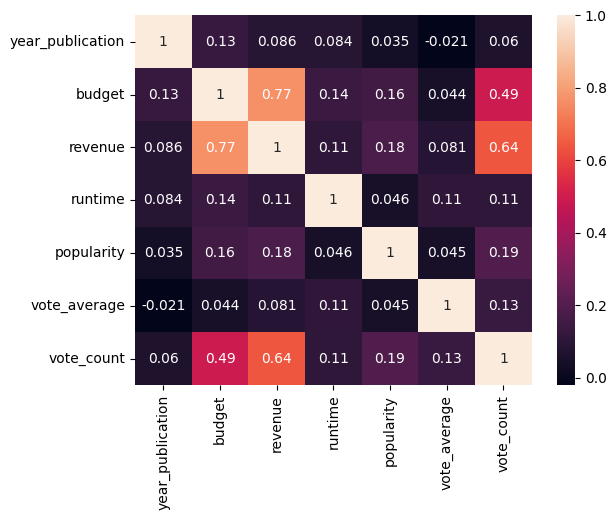

In [69]:
# analizar correlação das colunas
corr = data.corr()

#plotting the heatmap for correlation
ax = sns.heatmap(corr, annot=True)

/tmp/ipykernel_3060/2384815141.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data[data.original_language == 'en'].corr()


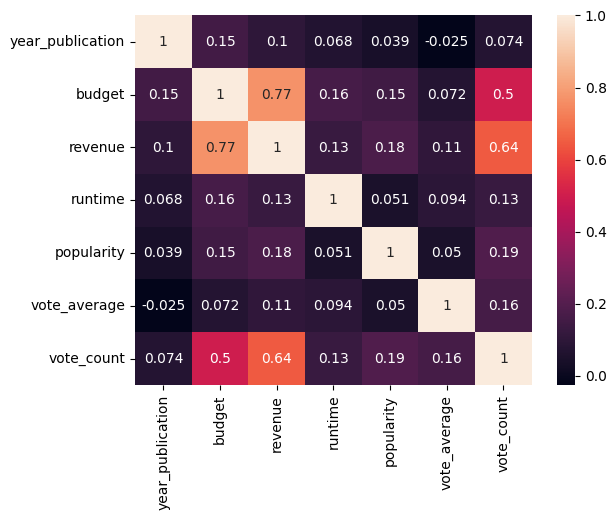

In [75]:
# analizar correlação das colunas com idioma 'en'
corr = data[data.original_language == 'en'].corr()
#plotting the heatmap for correlation
ax = sns.heatmap(corr, annot=True)

/tmp/ipykernel_3060/2766500793.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data[data.budget > 0].corr()


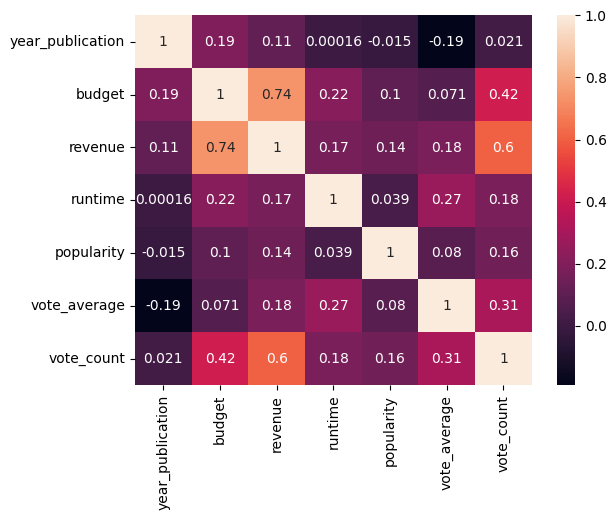

In [76]:
# analizar correlação das colunas com budget > 0
corr = data[data.budget > 0].corr()
#plotting the heatmap for correlation
ax = sns.heatmap(corr, annot=True)

In [19]:
# deletando colunas que tem  correlação insignificante e não tem  informação significante 
movies_df = data.drop(['popularity', 'vote_average'], axis=1)
movies_df.index = range(movies_df.shape[0])
movies_df

,title,year_publication,budget,revenue,runtime,genre_ids,original_language,id_movie,vote_count
0,citizen kane,1941,839727,23218000.0,119.0,"[9648, 18]",en,15,4851.0
1,vertigo,1958,2479000,7797728.0,128.0,"[9648, 10749, 53]",en,426,5053.0
2,2001: a space odyssey,1968,12000000,71923560.0,149.0,"[878, 9648, 12]",en,62,10192.0
3,the rules of the game,1939,8847685,0.0,106.0,"[18, 35, 10749]",fr,776,479.0
4,the godfather,1972,6000000,245066411.0,175.0,"[18, 80]",en,238,17885.0
...,...,...,...,...,...,...,...,...,...
42077,The Burkittsville 7,2000,0,0.0,30.0,[27],en,289923,1.0
42078,Caged Heat 3000,1995,0,0.0,85.0,[878],en,222848,1.0
42079,Robin Hood,1991,0,0.0,104.0,"[18, 28, 10749]",en,30840,26.0
42080,Century of Birthing,2011,0,0.0,360.0,[18],tl,111109,3.0


/tmp/ipykernel_23033/3524319880.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = movies_df.corr()


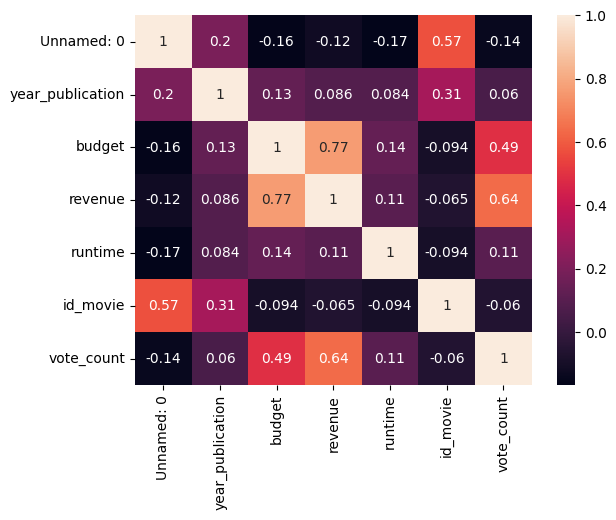

In [11]:
# correlação do novo dataframe
corr = movies_df.corr()
ax = sns.heatmap(corr, annot=True)

In [17]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

In [8]:
movies_df.columns

Index(['title', 'year_publication', 'budget', 'revenue', 'runtime',
       'genre_ids', 'original_language', 'id_movie', 'vote_count'],
      dtype='object')

## Treinando com colunas com 'boa' correlação e com genre_ids e original_language


In [2]:
movies_df = pd.read_csv("/home/lucas/projeto-outros-Mendes1302/data_source/metadata_movies_oficial.csv")
movies_df

,Unnamed: 0,title,year_publication,budget,revenue,runtime,genre_ids,original_language,popularity,id_movie,vote_average,vote_count
0,0,citizen kane,1941,839727,23218000.0,119.0,"[9648, 18]",en,18.681000,15,8.019,4851.0
1,1,vertigo,1958,2479000,7797728.0,128.0,"[9648, 10749, 53]",en,30.818000,426,8.191,5053.0
2,2,2001: a space odyssey,1968,12000000,71923560.0,149.0,"[878, 9648, 12]",en,38.672000,62,8.085,10192.0
3,3,the rules of the game,1939,8847685,0.0,106.0,"[18, 35, 10749]",fr,11.757000,776,7.592,479.0
4,4,the godfather,1972,6000000,245066411.0,175.0,"[18, 80]",en,95.565000,238,8.713,17885.0
...,...,...,...,...,...,...,...,...,...,...,...,...
42077,42077,The Burkittsville 7,2000,0,0.0,30.0,[27],en,0.386450,289923,7.000,1.0
42078,42078,Caged Heat 3000,1995,0,0.0,85.0,[878],en,0.661558,222848,3.500,1.0
42079,42079,Robin Hood,1991,0,0.0,104.0,"[18, 28, 10749]",en,5.683753,30840,5.700,26.0
42080,42080,Century of Birthing,2011,0,0.0,360.0,[18],tl,0.178241,111109,9.000,3.0


In [9]:
# Escolhendo colunas com 'boa' correlação e com genre_ids e original_language
features = ['original_language', 'budget', 'revenue', 'genre_ids', 'vote_count']
for feature in features:
    movies_df[feature] = movies_df[feature].fillna('')
    
def combine_features(row):
    txt = ''
    for feature in features:
        txt += str(row[feature]) + " "
    return txt

movies_df['combined_features'] = movies_df.apply(combine_features, axis=1)
cv = CountVectorizer()
movie_features = cv.fit_transform(movies_df['combined_features'])
movie_features = movie_features.toarray()
movie_similarity_matrix = cosine_similarity(movie_features)


In [10]:
def _get_name_genres(movie_show):

    genres = {28: "Action", 12: "Adventure", 16: "Animation", 35: "Comedy", 10769: "Foreign", 
              80: "Crime", 99: "Documentary", 18: "Drama", 10751: "Family", 
              14: "Fantasy", 36: "History", 27: "Horror", 10402: "Music", 
              9648: "Mystery", 10749: "Romance", 878: "Science Fiction",
              10770: "TV Movie", 53: "Thriller", 10752: "War", 37: "Western"}
    movie_show.index = range(movie_show.shape[0])
    for i in range(movie_show.shape[0]):
        genre_ids = movie_show.genre_ids[i]
        if type(genre_ids) == str:
            genre_ids = literal_eval(genre_ids)
        movie_show.at[i, 'genre_ids'] = [genres[int(id)] for id in genre_ids]
    return movie_show

In [11]:
def get_similar_movies(movie_name, movie_similarity_matrix, movies_df):
    
    index = movies_df[movies_df['title'] == movie_name].index[0]
    movie_scores = list(enumerate(movie_similarity_matrix[index]))
    movie_scores = sorted(movie_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in movie_scores]
    drop_cols = ['budget', 'revenue', 'combined_features', 'vote_count']
    movie_show = movies_df.iloc[movie_indices].drop(drop_cols, axis=1)
    return _get_name_genres(movie_show)

In [12]:
movie_name = 'Logan'
similar_movies = get_similar_movies(movie_name, movie_similarity_matrix, movies_df)
similar_movies.head()

NameError: name 'movie_similarity_matrix' is not defined

In [106]:
movies_df[1000:1050]

,title,year_publication,budget,revenue,runtime,genre_ids,original_language,id_movie,vote_count,combined_features
1000,She's So Lovely,1997,18000000,0.0,100.0,"[18, 10749, 53]",en,38295,26.0,"en 18000000 0.0 [18, 10749, 53] 26.0"
1001,Hoodlum,1997,30000000,0.0,130.0,"[80, 18]",en,22073,33.0,"en 30000000 0.0 [80, 18] 33.0"
1002,Mimic,1997,30000000,25480490.0,105.0,"[14, 27, 53]",en,4961,255.0,"en 30000000 25480490.0 [14, 27, 53] 255.0"
1003,Air Force One,1997,85000000,315156409.0,124.0,"[28, 53]",en,9772,859.0,"en 85000000 315156409.0 [28, 53] 859.0"
1004,One Eight Seven,1997,20000000,5716080.0,119.0,"[18, 53]",en,6072,141.0,"en 20000000 5716080.0 [18, 53] 141.0"
1005,The Hunt for Red October,1990,30000000,199200000.0,134.0,"[28, 12, 53]",en,1669,971.0,"en 30000000 199200000.0 [28, 12, 53] 971.0"
1006,In & Out,1997,35000000,0.0,90.0,"[35, 10749]",en,10806,181.0,"en 35000000 0.0 [35, 10749] 181.0"
1007,The Peacemaker,1997,50000000,0.0,124.0,"[28, 53]",en,6623,263.0,"en 50000000 0.0 [28, 53] 263.0"
1008,L.A. Confidential,1997,35000000,126216940.0,138.0,"[80, 18, 9648, 53]",en,2118,1340.0,"en 35000000 126216940.0 [80, 18, 9648, 53] 134..."
1009,Seven Years in Tibet,1997,70000000,131457682.0,136.0,"[12, 18, 36]",en,978,644.0,"en 70000000 131457682.0 [12, 18, 36] 644.0"


In [114]:
16 in [movies_df.genre_ids[i]]

False

In [123]:
for i in range(movies_df.shape[0]):
    genre_ids = movies_df.genre_ids[i]
    if type(genre_ids) == str:
        genre_ids = literal_eval(movies_df.genre_ids[i])
    if 16 in genre_ids:
        print(movies_df.title[i], movies_df.year_publication[i])

m 1931
spirited away 2001
my neighbour totoro 1988
snow white and the seven dwarfs 1937
fantasia 1940
princess mononoke 1997
bambi 1942
toy story 1995
akira 1988
stand by me 1986
dumbo 1941
persepolis 2007
Pocahontas 1995
The Swan Princess 1994
The Lion King 1994
The Nightmare Before Christmas 1993
The Pagemaster 1994
Aladdin 1992
Beauty and the Beast 1991
Pinocchio 1940
Heavy Metal 1981
The Aristocats 1970
James and the Giant Peach 1996
Space Jam 1996
Oliver & Company 1988
The Hunchback of Notre Dame 1996
Cinderella 1950
The Sword in the Stone 1963
Pete's Dragon 1977
Bedknobs and Broomsticks 1971
Alice in Wonderland 1951
The Fox and the Hound 1981
Beavis and Butt-Head Do America 1996
Cats Don't Dance 1997
Hercules 1997
Anastasia 1997
Meet the Deedles 1998
Quest for Camelot 1998
Mulan 1998
The Black Cauldron 1985
The Great Mouse Detective 1986
The Jungle Book 1967
The Little Mermaid 1989
One Hundred and One Dalmatians 1961
Peter Pan 1953
The Rescuers Down Under 1990
The Rescuers 1977
S

In [24]:
cols_remove = ["title", "year_publication", "id_movie"]

In [28]:
movies_df

,title,year_publication,budget,revenue,runtime,genre_ids,original_language,id_movie,vote_count
0,citizen kane,1941,839727,23218000.0,119.0,"[9648, 18]",en,15,4851.0
1,vertigo,1958,2479000,7797728.0,128.0,"[9648, 10749, 53]",en,426,5053.0
2,2001: a space odyssey,1968,12000000,71923560.0,149.0,"[878, 9648, 12]",en,62,10192.0
3,the rules of the game,1939,8847685,0.0,106.0,"[18, 35, 10749]",fr,776,479.0
4,the godfather,1972,6000000,245066411.0,175.0,"[18, 80]",en,238,17885.0
...,...,...,...,...,...,...,...,...,...
42077,The Burkittsville 7,2000,0,0.0,30.0,[27],en,289923,1.0
42078,Caged Heat 3000,1995,0,0.0,85.0,[878],en,222848,1.0
42079,Robin Hood,1991,0,0.0,104.0,"[18, 28, 10749]",en,30840,26.0
42080,Century of Birthing,2011,0,0.0,360.0,[18],tl,111109,3.0


In [18]:
from sklearn.cluster import KMeans

In [31]:
movies_df['sum_genre_ids'] = [0 for _ in range(movies_df.shape[0])]
movies_df


,title,year_publication,budget,revenue,runtime,genre_ids,original_language,id_movie,vote_count,sum_genre_ids
0,citizen kane,1941,839727,23218000.0,119.0,"[9648, 18]",en,15,4851.0,0
1,vertigo,1958,2479000,7797728.0,128.0,"[9648, 10749, 53]",en,426,5053.0,0
2,2001: a space odyssey,1968,12000000,71923560.0,149.0,"[878, 9648, 12]",en,62,10192.0,0
3,the rules of the game,1939,8847685,0.0,106.0,"[18, 35, 10749]",fr,776,479.0,0
4,the godfather,1972,6000000,245066411.0,175.0,"[18, 80]",en,238,17885.0,0
...,...,...,...,...,...,...,...,...,...,...
42077,The Burkittsville 7,2000,0,0.0,30.0,[27],en,289923,1.0,0
42078,Caged Heat 3000,1995,0,0.0,85.0,[878],en,222848,1.0,0
42079,Robin Hood,1991,0,0.0,104.0,"[18, 28, 10749]",en,30840,26.0,0
42080,Century of Birthing,2011,0,0.0,360.0,[18],tl,111109,3.0,0


In [144]:
import numpy 


In [4]:
for i in range(movies_df.shape[0]):
    genre_ids = movies_df.genre_ids[i]
    if type(genre_ids) == str:
        genre_ids = literal_eval(movies_df.genre_ids[i])
    movies_df.at[i, 'sum_genre_ids'] = sum(genre_ids)
movies_df


/tmp/ipykernel_4742/1472785576.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.at[i, 'sum_genre_ids'] = sum(genre_ids)


,Unnamed: 0,title,year_publication,budget,revenue,runtime,genre_ids,original_language,popularity,id_movie,vote_average,vote_count,sum_genre_ids
0,0,citizen kane,1941,839727,23218000.0,119.0,"[9648, 18]",en,18.681000,15,8.019,4851.0,9666.0
1,1,vertigo,1958,2479000,7797728.0,128.0,"[9648, 10749, 53]",en,30.818000,426,8.191,5053.0,20450.0
2,2,2001: a space odyssey,1968,12000000,71923560.0,149.0,"[878, 9648, 12]",en,38.672000,62,8.085,10192.0,10538.0
3,3,the rules of the game,1939,8847685,0.0,106.0,"[18, 35, 10749]",fr,11.757000,776,7.592,479.0,10802.0
4,4,the godfather,1972,6000000,245066411.0,175.0,"[18, 80]",en,95.565000,238,8.713,17885.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40376,42077,The Burkittsville 7,2000,0,0.0,30.0,[27],en,0.386450,289923,7.000,1.0,27.0
40377,42078,Caged Heat 3000,1995,0,0.0,85.0,[878],en,0.661558,222848,3.500,1.0,878.0
40378,42079,Robin Hood,1991,0,0.0,104.0,"[18, 28, 10749]",en,5.683753,30840,5.700,26.0,10795.0
40379,42080,Century of Birthing,2011,0,0.0,360.0,[18],tl,0.178241,111109,9.000,3.0,18.0


In [7]:
movies_df.columns

Index(['Unnamed: 0', 'title', 'year_publication', 'budget', 'revenue',
       'runtime', 'genre_ids', 'original_language', 'popularity', 'id_movie',
       'vote_average', 'vote_count', 'sum_genre_ids'],
      dtype='object')

/tmp/ipykernel_4742/1084556807.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = movies_df.drop(['Unnamed: 0', 'year_publication', 'genre_ids',  'popularity' ], axis=1).corr()


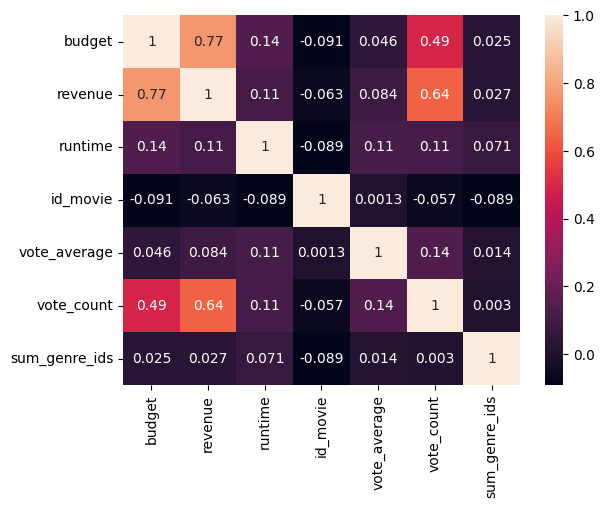

In [9]:
# analizar correlação das colunas
corr = movies_df.drop(['Unnamed: 0', 'year_publication', 'genre_ids',  'popularity' ], axis=1).corr()

#plotting the heatmap for correlation
ax = sns.heatmap(corr, annot=True)

## Recomendação

In [3]:
movies_df = movies_df[movies_df.genre_ids != '[]']
movies_df.index = range(movies_df.shape[0])
movies_df

,Unnamed: 0,title,year_publication,budget,revenue,runtime,genre_ids,original_language,popularity,id_movie,vote_average,vote_count
0,0,citizen kane,1941,839727,23218000.0,119.0,"[9648, 18]",en,18.681000,15,8.019,4851.0
1,1,vertigo,1958,2479000,7797728.0,128.0,"[9648, 10749, 53]",en,30.818000,426,8.191,5053.0
2,2,2001: a space odyssey,1968,12000000,71923560.0,149.0,"[878, 9648, 12]",en,38.672000,62,8.085,10192.0
3,3,the rules of the game,1939,8847685,0.0,106.0,"[18, 35, 10749]",fr,11.757000,776,7.592,479.0
4,4,the godfather,1972,6000000,245066411.0,175.0,"[18, 80]",en,95.565000,238,8.713,17885.0
...,...,...,...,...,...,...,...,...,...,...,...,...
40376,42077,The Burkittsville 7,2000,0,0.0,30.0,[27],en,0.386450,289923,7.000,1.0
40377,42078,Caged Heat 3000,1995,0,0.0,85.0,[878],en,0.661558,222848,3.500,1.0
40378,42079,Robin Hood,1991,0,0.0,104.0,"[18, 28, 10749]",en,5.683753,30840,5.700,26.0
40379,42080,Century of Birthing,2011,0,0.0,360.0,[18],tl,0.178241,111109,9.000,3.0


In [11]:
movies_df = movies_df[movies_df.budget > 0]
movies_df.index = range(movies_df.shape[0])
movies_df

,Unnamed: 0,title,year_publication,budget,revenue,runtime,genre_ids,original_language,popularity,id_movie,vote_average,vote_count,sum_genre_ids
0,0,citizen kane,1941,839727,23218000.0,119.0,"[9648, 18]",en,18.681000,15,8.019,4851.0,9666.0
1,1,vertigo,1958,2479000,7797728.0,128.0,"[9648, 10749, 53]",en,30.818000,426,8.191,5053.0,20450.0
2,2,2001: a space odyssey,1968,12000000,71923560.0,149.0,"[878, 9648, 12]",en,38.672000,62,8.085,10192.0,10538.0
3,3,the rules of the game,1939,8847685,0.0,106.0,"[18, 35, 10749]",fr,11.757000,776,7.592,479.0,10802.0
4,4,the godfather,1972,6000000,245066411.0,175.0,"[18, 80]",en,95.565000,238,8.713,17885.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8822,42027,Corporate Event,2014,2000000,0.0,89.0,[35],ru,0.524370,293654,3.500,4.0,35.0
8823,42033,Mars,2004,2000000,0.0,100.0,[35],ru,0.380933,100152,5.000,2.0,35.0
8824,42034,Savages,2006,800000,1328612.0,100.0,"[35, 18]",en,0.903061,62757,5.800,6.0,53.0
8825,42036,Pro Lyuboff,2010,2000000,1268793.0,107.0,"[10749, 18]",en,0.121844,63281,4.000,3.0,10767.0


/tmp/ipykernel_4742/1408094905.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = movies_df.drop(['Unnamed: 0', 'id_movie'], axis=1).corr()


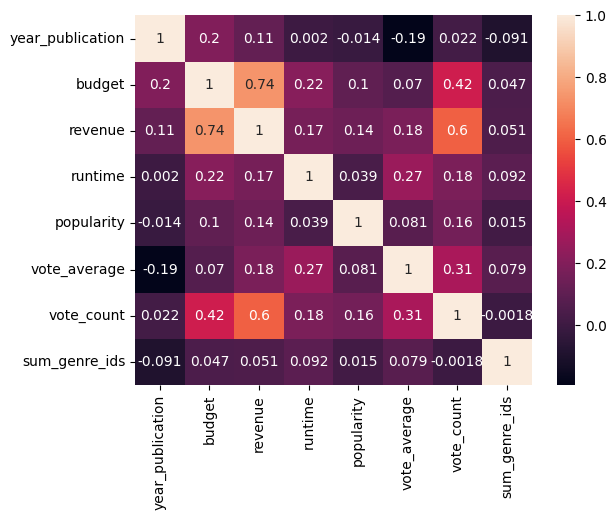

In [22]:
corr = movies_df.drop(['Unnamed: 0', 'id_movie'], axis=1).corr()

#plotting the heatmap for correlation
ax = sns.heatmap(corr, annot=True)

In [12]:
movies_df.dtypes

Unnamed: 0             int64
title                 object
year_publication       int64
budget                 int64
revenue              float64
runtime              float64
genre_ids             object
original_language     object
popularity           float64
id_movie               int64
vote_average         float64
vote_count           float64
sum_genre_ids        float64
dtype: object

In [66]:
from sklearn.preprocessing import MinMaxScaler
features = ["sum_genre_ids", "revenue", "budget"]
X = movies_df[features]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_normalized)

/home/lucas/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [67]:
from sklearn.metrics import silhouette_score

labels = kmeans.predict(X_normalized)
score = silhouette_score(X_normalized, labels)
print("Silhouette score:", score)

Silhouette score: 0.6690734543731894


In [27]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def similarity(x1, x2):
    return 1 / (1 + euclidean_distance(x1, x2))

In [28]:
def _get_name_genres(movie_show):

    genres = {28: "Action", 12: "Adventure", 16: "Animation", 35: "Comedy", 10769: "Foreign", 
              80: "Crime", 99: "Documentary", 18: "Drama", 10751: "Family", 
              14: "Fantasy", 36: "History", 27: "Horror", 10402: "Music", 
              9648: "Mystery", 10749: "Romance", 878: "Science Fiction",
              10770: "TV Movie", 53: "Thriller", 10752: "War", 37: "Western"}
    movie_show.index = range(movie_show.shape[0])
    for i in range(movie_show.shape[0]):
        genre_ids = movie_show.genre_ids[i]
        if type(genre_ids) == str:
            genre_ids = literal_eval(genre_ids)
        movie_show.at[i, 'genre_ids'] = [genres[int(id)] for id in genre_ids]
    return movie_show

In [124]:
movies_df

,title,year_publication,budget,revenue,runtime,genre_ids,original_language,id_movie,vote_count,sum_genre_ids
0,citizen kane,1941,839727,23218000.0,119.0,"[9648, 18]",en,15,4851.0,9666
1,vertigo,1958,2479000,7797728.0,128.0,"[9648, 10749, 53]",en,426,5053.0,20450
2,2001: a space odyssey,1968,12000000,71923560.0,149.0,"[878, 9648, 12]",en,62,10192.0,10538
3,the rules of the game,1939,8847685,0.0,106.0,"[18, 35, 10749]",fr,776,479.0,10802
4,the godfather,1972,6000000,245066411.0,175.0,"[18, 80]",en,238,17885.0,98
...,...,...,...,...,...,...,...,...,...,...
40376,The Burkittsville 7,2000,0,0.0,30.0,[27],en,289923,1.0,27
40377,Caged Heat 3000,1995,0,0.0,85.0,[878],en,222848,1.0,878
40378,Robin Hood,1991,0,0.0,104.0,"[18, 28, 10749]",en,30840,26.0,10795
40379,Century of Birthing,2011,0,0.0,360.0,[18],tl,111109,3.0,18


In [97]:
def recommend_movies(movies, movie_id, n=5):
    # Encontrar o cluster do filme de entrada

    features_col = ["budget", "revenue", "vote_count", "sum_genre_ids", "vote_average"]
    features_col = ["sum_genre_ids", "revenue", "budget"]
    movie = movies[movies["id_movie"] == movie_id][features_col].values
    movie_normalized = scaler.transform(movie)
    cluster = kmeans.predict(movie_normalized)[0]

    # Selecionar os filmes dentro do mesmo cluster
    cluster_movies = movies[labels == cluster][["title"] +["id_movie"]+ features_col]

    # Calcular a similaridade entre o filme de entrada e os filmes no cluster
    similarities = []
    for i, row in cluster_movies.iterrows():
        features = row[2:].values.reshape(1, -1)
        var_similarity = cosine_similarity(movie_normalized, features)
        similarities.append((row["id_movie"], var_similarity))

    # Ordenar os filmes por ordem crescente de similaridade e selecionar os n mais semelhantes
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    print(similarities)
    top_movies = [movie[0] for movie in similarities[:n]]
    is_present = movies['id_movie'].isin(top_movies)
    #drop_cols = ['budget', 'revenue', 'sum_genre_ids', 'vote_count']
    recommendation_movie = movies[is_present]

    return _get_name_genres(recommendation_movie)
recommend = recommend_movies(movies_df, 2454	, 10) #  Harry Potter and the Chamber of Secrets

recommend

[(50321, array([[0.88333526]])), (10733, array([[0.88101529]])), (11619, array([[0.87215441]])), (9016, array([[0.80830986]])), (266647, array([[0.7919223]])), (76649, array([[0.78048718]])), (7364, array([[0.7779718]])), (2698, array([[0.76183475]])), (81005, array([[0.75614287]])), (1966, array([[0.74151039]])), (44826, array([[0.73851547]])), (158852, array([[0.73675559]])), (1267, array([[0.73058498]])), (65759, array([[0.72448723]])), (267935, array([[0.69254015]])), (10996, array([[0.67158058]])), (13183, array([[0.66990945]])), (11774, array([[0.65717745]])), (10865, array([[0.64692694]])), (1495, array([[0.6335293]])), (9477, array([[0.62223902]])), (241259, array([[0.611994]])), (44896, array([[0.60297375]])), (5255, array([[0.5979926]])), (2454, array([[0.59633497]])), (82703, array([[0.59387501]])), (105864, array([[0.5917849]])), (5559, array([[0.588871]])), (19585, array([[0.58402105]])), (260514, array([[0.57739101]])), (13053, array([[0.56881153]])), (77950, array([[0.56

/home/lucas/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,Unnamed: 0,title,year_publication,budget,revenue,runtime,genre_ids,original_language,popularity,id_movie,vote_average,vote_count,sum_genre_ids
0,5630,Treasure Planet,2002,140000000,109578115.0,95.0,"[Adventure, Animation, Family, Fantasy, Scienc...",en,16.141913,9016,7.2,980.0,11671.0
1,7003,The Alamo,2004,145000000,25819961.0,137.0,"[Western, History, War]",en,12.240901,10733,5.8,108.0,10825.0
2,7954,Alexander,2004,155000000,167298192.0,175.0,"[War, History, Action, Adventure, Drama, Romance]",en,13.498641,1966,5.6,957.0,21595.0
3,9501,Sahara,2005,130000000,119269486.0,124.0,"[Action, Adventure, Comedy, Drama, Mystery]",en,8.946243,7364,5.7,440.0,9741.0
4,10927,Flushed Away,2006,149000000,64459316.0,85.0,"[Adventure, Animation, Comedy, Family]",en,9.922577,11619,6.0,909.0,10814.0
5,11454,Evan Almighty,2007,175000000,173000000.0,96.0,"[Fantasy, Comedy, Family]",en,9.156877,2698,5.3,1194.0,10800.0
6,16056,Mars Needs Moms,2011,150000000,38992758.0,88.0,"[Adventure, Animation, Family]",en,7.247170,50321,5.6,202.0,10779.0
7,19522,Jack the Giant Slayer,2013,195000000,197687603.0,114.0,"[Action, Family, Fantasy]",en,11.606061,81005,5.5,2634.0,10793.0
8,22059,Pompeii,2014,130000000,117831631.0,105.0,"[Action, Adventure, History, Romance, Drama]",en,12.204174,76649,5.2,1294.0,10843.0
9,27076,Pan,2015,150000000,128388320.0,111.0,"[Adventure, Family, Fantasy]",en,11.304280,266647,5.9,979.0,10777.0


In [99]:
aux = movies_df[movies_df.id_movie == 2454	]
_get_name_genres(aux)

,Unnamed: 0,title,year_publication,budget,revenue,runtime,genre_ids,original_language,popularity,id_movie,vote_average,vote_count,sum_genre_ids
0,12121,The Chronicles of Narnia: Prince Caspian,2008,225000000,419651413.0,150.0,"[Adventure, Family, Fantasy]",en,12.490891,2454,6.3,1668.0,10777.0


In [98]:
recommend = recommend_movies(movies_df, 109445, 10) #  titanic

recommend

[(65759, array([[0.88104038]])), (1267, array([[0.88096795]])), (158852, array([[0.88077359]])), (44826, array([[0.88067167]])), (1966, array([[0.88052371]])), (267935, array([[0.87943872]])), (81005, array([[0.87910486]])), (2698, array([[0.87830405]])), (10996, array([[0.87684669]])), (13183, array([[0.87659125]])), (7364, array([[0.87511605]])), (76649, array([[0.87448726]])), (11774, array([[0.87445063]])), (10865, array([[0.87247555]])), (266647, array([[0.8710826]])), (1495, array([[0.86956314]])), (9477, array([[0.86684512]])), (9016, array([[0.86446565]])), (241259, array([[0.86417324]])), (44896, array([[0.86167771]])), (5255, array([[0.86023755]])), (2454, array([[0.85974737]])), (82703, array([[0.85902007]])), (105864, array([[0.85838901]])), (5559, array([[0.8575021]])), (19585, array([[0.85599394]])), (260514, array([[0.85387257]])), (13053, array([[0.85103383]])), (77950, array([[0.8498869]])), (9982, array([[0.8497515]])), (81188, array([[0.84886335]])), (10196, array([[

/home/lucas/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,Unnamed: 0,title,year_publication,budget,revenue,runtime,genre_ids,original_language,popularity,id_movie,vote_average,vote_count,sum_genre_ids
0,5261,Stuart Little 2,2002,120000000,169956806.0,78.0,"[Family, Adventure, Animation, Comedy]",en,9.274909,10996,5.4,632.0,10814.0
1,7954,Alexander,2004,155000000,167298192.0,175.0,"[War, History, Action, Adventure, Drama, Romance]",en,13.498641,1966,5.6,957.0,21595.0
2,11263,Meet the Robinsons,2007,150000000,169332978.0,95.0,"[Animation, Comedy, Family]",en,10.529576,1267,6.7,787.0,10802.0
3,11454,Evan Almighty,2007,175000000,173000000.0,96.0,"[Fantasy, Comedy, Family]",en,9.156877,2698,5.3,1194.0,10800.0
4,12317,Watchmen,2009,130000000,185258983.0,163.0,"[Action, Mystery, Science Fiction]",en,16.551503,13183,7.0,2892.0,10554.0
5,17284,Hugo,2011,170000000,185770160.0,126.0,"[Adventure, Drama, Family]",en,14.046164,44826,7.0,2197.0,10781.0
6,17404,Happy Feet Two,2011,130000000,150406466.0,100.0,"[Animation, Comedy, Family]",en,9.141045,65759,5.8,381.0,10802.0
7,19522,Jack the Giant Slayer,2013,195000000,197687603.0,114.0,"[Action, Family, Fantasy]",en,11.606061,81005,5.5,2634.0,10793.0
8,27557,Tomorrowland,2015,190000000,209154322.0,130.0,"[Adventure, Family, Mystery, Science Fiction]",en,22.296076,158852,6.2,2904.0,21289.0
9,36052,The BFG,2016,140000000,183345589.0,120.0,"[Adventure, Family, Fantasy]",en,18.769476,267935,6.0,1026.0,10777.0


In [76]:
recommend.describe()

,Unnamed: 0,year_publication,runtime,popularity,id_movie,vote_average
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,21372.200000,2013.200000,140.400000,73.330143,97737.200000,7.180000
std,5625.735925,2.683282,13.903237,67.571921,70084.757667,0.396232
min,13927.000000,2009.000000,124.000000,27.275687,19995.000000,6.500000
25%,17029.000000,2012.000000,136.000000,31.626013,24428.000000,7.200000
50%,23708.000000,2015.000000,137.000000,32.790475,135397.000000,7.300000
75%,25057.000000,2015.000000,143.000000,89.887648,140607.000000,7.400000
max,27140.000000,2015.000000,162.000000,185.070892,168259.000000,7.500000


In [105]:
labels

array([2, 3, 2, ..., 5, 2, 2], dtype=int32)

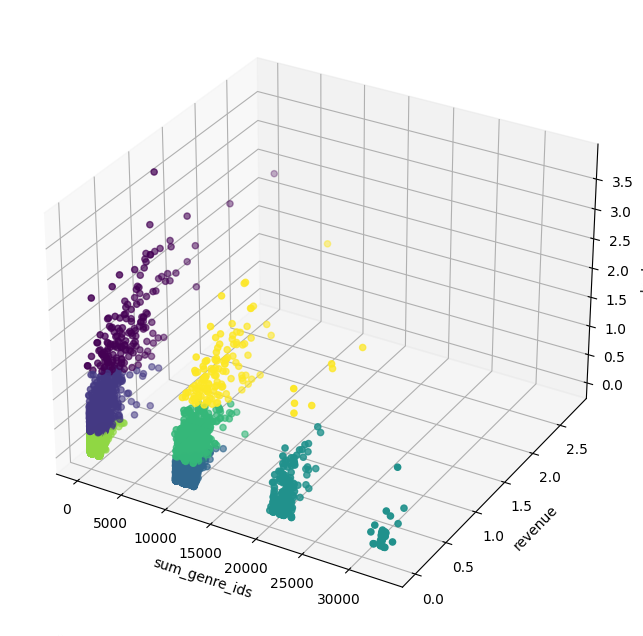

In [108]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plotar o gráfico de dispersão em 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=kmeans.labels_)
ax.set_xlabel('sum_genre_ids')
ax.set_ylabel('revenue')
ax.set_zlabel('budget')
plt.show()


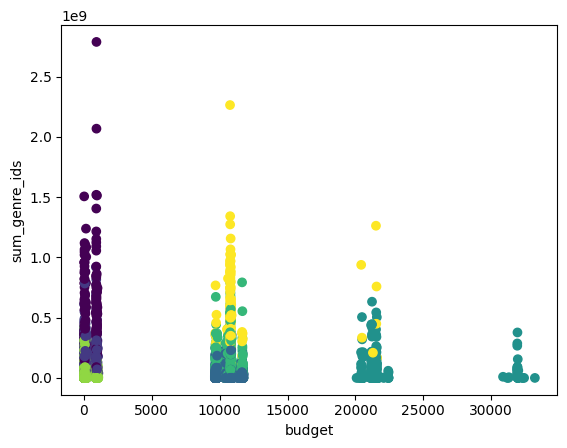

In [112]:
import matplotlib.pyplot as plt

# Plotar o gráfico de dispersão em 2D
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_)
plt.xlabel('budget')
plt.ylabel('sum_genre_ids')
plt.show()


In [6]:
txt = ''.join(str(i) for i in [3, 12])
int(txt)

312

In [4]:
txt = ""
for i in [3, 12]:
    txt+= str(i)
txt

'312'

In [2]:
[i for i in [3, 12]] 

[3, 12]

In [82]:
aux = movies_df[movies_df.id_movie == 2454	]
_get_name_genres(aux)

,Unnamed: 0,title,year_publication,budget,revenue,runtime,genre_ids,original_language,popularity,id_movie,vote_average,vote_count,sum_genre_ids
0,23708,Jurassic World,2015,150000000,1.513529e+09,124.0,"[Action, Adventure, Science Fiction, Thriller]",en,32.790475,135397,6.5,8842.0,971.0


In [102]:
for i in range(movies_df.shape[0]):
    if "bo" in movies_df.title[i].lower():
        print(movies_df.title[i], movies_df.id_movie[i], movies_df.year_publication[i])

dr. strangelove or: how i learned to stop worrying and love the bomb 935 1964
all about eve 705 1950
the umbrellas of cherbourg 5967 1964
my neighbour totoro 8392 1988
the discreet charm of the bourgeoisie 4593 1972
the big lebowski 115 1998
all about my mother 99 1999
bonnie and clyde 475 1967
midnight cowboy 3116 1969
the white ribbon 37903 2009
a star is born 332562 1954
boogie nights 4995 1997
oldboy 87516 2003
boyhood 85350 2014
robocop 5548 1987
she wore a yellow ribbon 13909 1949
dumbo 11360 1941
invasion of the body snatchers 11850 1956
mysteries of lisbon 57403 2010
The Indian in the Cupboard 11359 1995
Bottle Rocket 13685 1996
Boomerang 11066 1992
Bad Boys 9737 1995
Boys on the Side 9382 1995
Natural Born Killers 241 1994
Body Snatchers 4722 1993
Much Ado About Nothing 11971 1993
RoboCop 3 5550 1993
Mrs. Winterbourne 40001 1996
Bordello of Blood 9431 1996
Bound 9303 1996
Bogus 3587 1996
Sunset Boulevard 599 1950
Spellbound 4174 1945
Das Boot 387 1981
Turbo: A Power Rangers Mo